# Second level analysis
The purpose of this ipynb is to plot contrasts from the Posner Cueing task
1. contrast 1: invalid > valid
2. contrast 2: target response epoch (participants judge target location left/right)


In [8]:
import numpy as np
import pandas as pd
import os, glob, re
from os.path import join
from pathlib import Path
import nilearn
import argparse
from nilearn import image, plotting
from nilearn.glm.first_level import FirstLevelModel
from nilearn.glm import threshold_stats_img
import matplotlib.pyplot as plt
from scipy.stats import norm
from nilearn.glm import cluster_level_inference
from nilearn import plotting
from nilearn.glm.second_level import SecondLevelModel


## parameters

In [9]:
# parameters
main_dir ='/Volumes/spacetop_projects_fractional/'
# con_dir = '/dartfs-hpc/rc/lab/C/CANlab/labdata/projects/spacetop_projects_fractional/analysis/fmri/nilearn/glm/task-tomsaxe/sub-0066'
task_name = 'task-posner'
con_dir = join(main_dir, 'analysis', 'fmri', 'nilearn', 'glm', task_name)


## Contrast01: Invalid > Valid

total number of images: 44
filenames: ['/Volumes/spacetop_projects_fractional/analysis/fmri/nilearn/glm/task-posner/sub-0003/sub-0003_ses-04_task-posner_run-01_con-01_desc-invalidGTvalid_stat-betamap.nii.gz', '/Volumes/spacetop_projects_fractional/analysis/fmri/nilearn/glm/task-posner/sub-0009/sub-0009_ses-04_task-posner_run-01_con-01_desc-invalidGTvalid_stat-betamap.nii.gz', '/Volumes/spacetop_projects_fractional/analysis/fmri/nilearn/glm/task-posner/sub-0010/sub-0010_ses-04_task-posner_run-02_con-01_desc-invalidGTvalid_stat-betamap.nii.gz', '/Volumes/spacetop_projects_fractional/analysis/fmri/nilearn/glm/task-posner/sub-0011/sub-0011_ses-04_task-posner_run-01_con-01_desc-invalidGTvalid_stat-betamap.nii.gz', '/Volumes/spacetop_projects_fractional/analysis/fmri/nilearn/glm/task-posner/sub-0014/sub-0014_ses-04_task-posner_run-02_con-01_desc-invalidGTvalid_stat-betamap.nii.gz', '/Volumes/spacetop_projects_fractional/analysis/fmri/nilearn/glm/task-posner/sub-0018/sub-0018_ses-04_task-posn

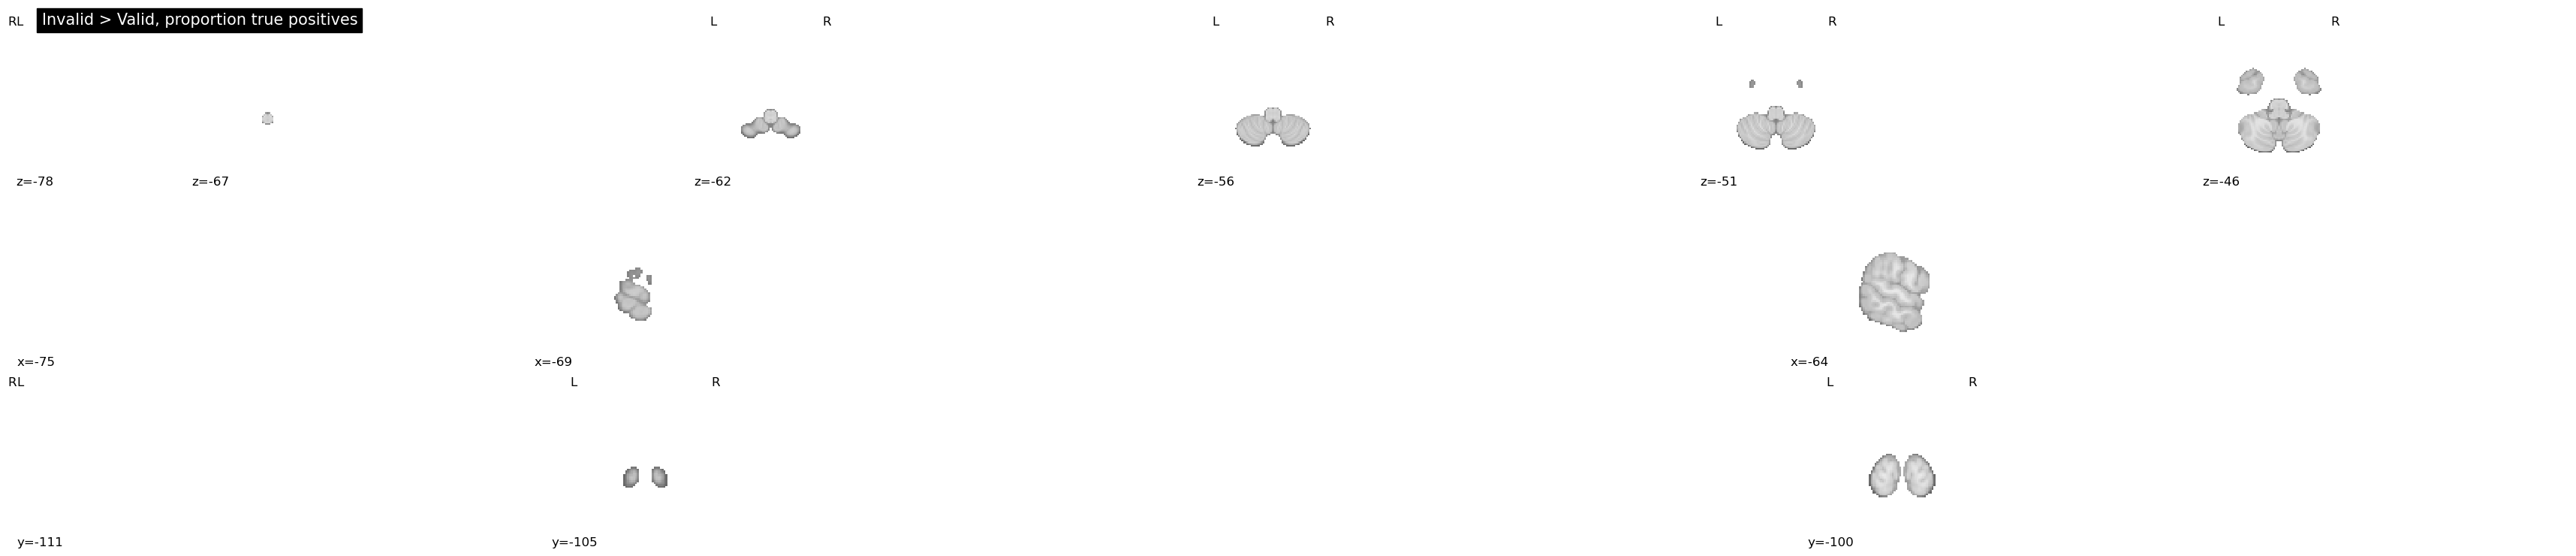

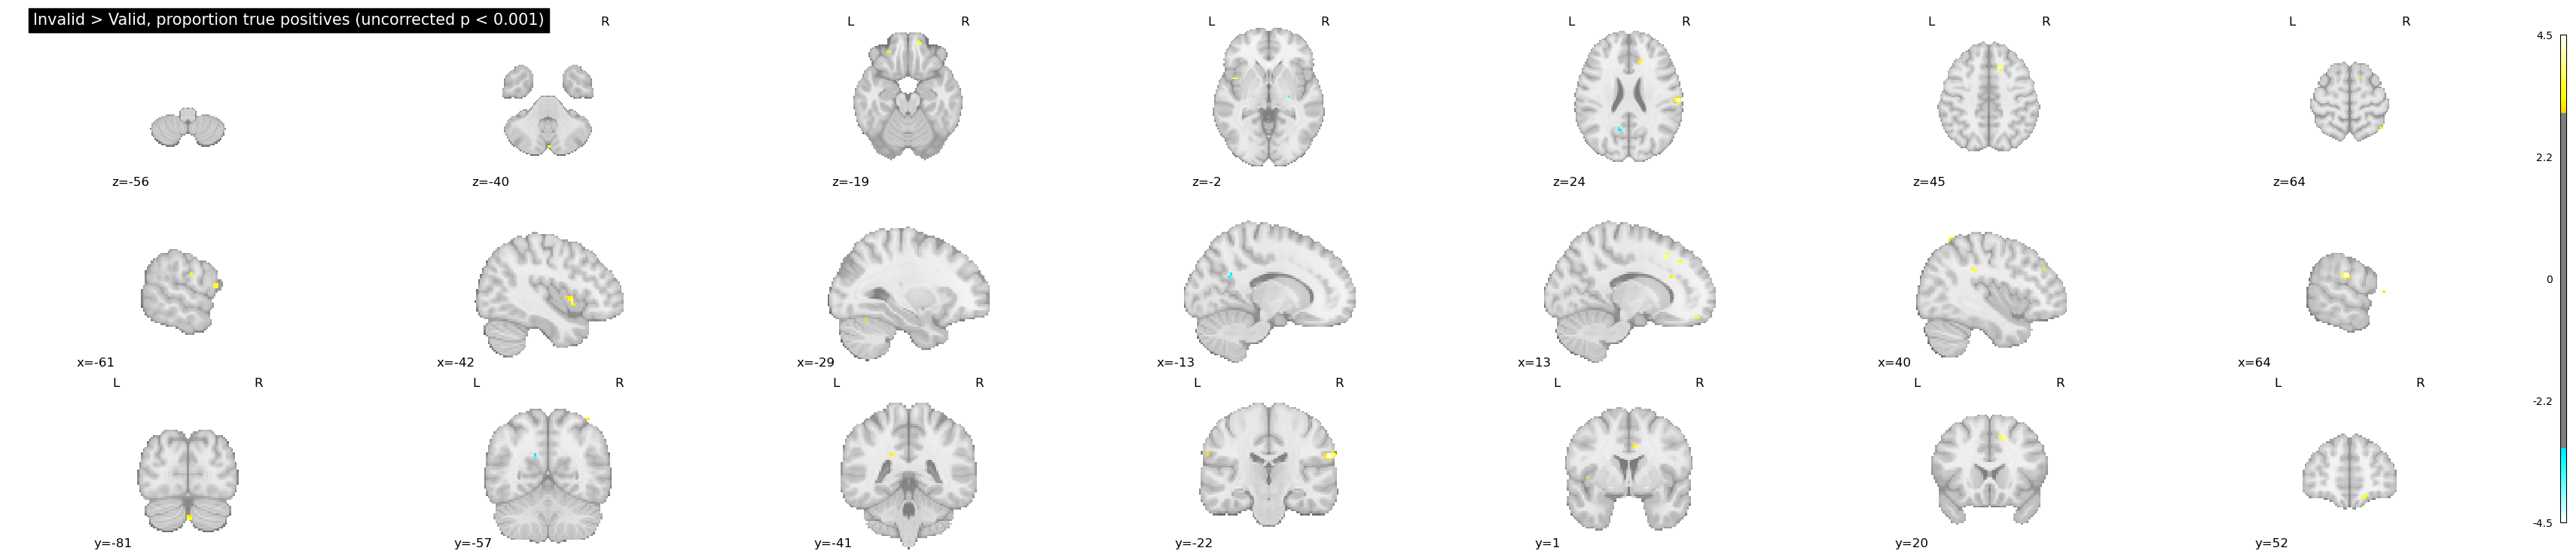

In [10]:
# load images
beta01_template = f'*_ses-04_{task_name}_run*_con-01_desc-invalidGTvalid_stat-betamap.nii.gz'
second_level_input  = sorted(glob.glob(join(con_dir, '**', beta01_template), recursive = True))

print(f"total number of images: {len(second_level_input)}")
print(f"filenames: {second_level_input}")

design_matrix = pd.DataFrame(
    [1] * len(second_level_input), columns=["intercept"]
)

second_level_model = SecondLevelModel(smoothing_fwhm=6.0)
second_level_model = second_level_model.fit(
    second_level_input, design_matrix=design_matrix
)

z_map = second_level_model.compute_contrast(output_type="z_score")


p_val = 0.001
p001_uncorrected = norm.isf(p_val)

proportion_true_discoveries_img = cluster_level_inference(
    z_map, threshold=[3, 4, 5], alpha=0.05
)

plotting.plot_stat_map(
    proportion_true_discoveries_img,
    threshold=0.0,
    display_mode="mosaic",
    vmax=1,
    colorbar=True,
    title="Invalid > Valid, proportion true positives",
)

plotting.plot_stat_map(
    z_map,
    threshold=p001_uncorrected,
    colorbar=True,
    display_mode="mosaic",
    title="Invalid > Valid, proportion true positives (uncorrected p < 0.001)",
)

plotting.show()

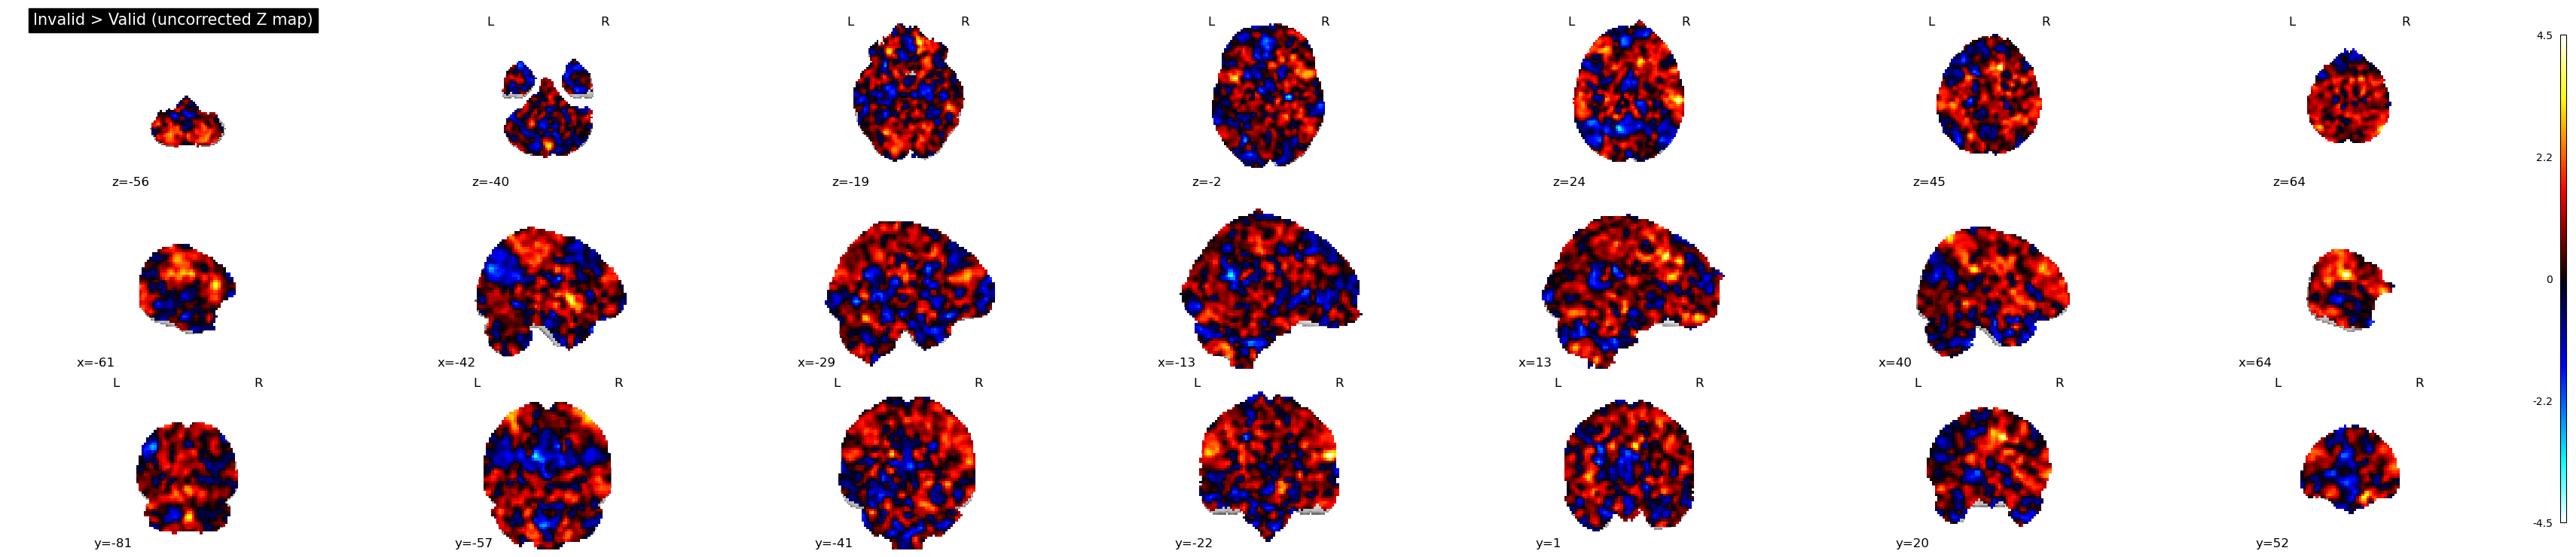

In [11]:
zmap = plotting.plot_stat_map(
    z_map,
    threshold=0.0,
    colorbar=True,
    display_mode="mosaic",
    title="Invalid > Valid (uncorrected Z map)",
)
z_map.to_filename('second-level_task-posner_con-01_desc-invalidGTvalid_stat-betamap.nii.gz')

## Contrast02: rating

In [6]:
# load images
# con_dir = '/dartfs-hpc/rc/lab/C/CANlab/labdata/projects/spacetop_projects_fractional/analysis/fmri/nilearn/glm/task-tomsaxe/sub-0066'
main_dir ='/Volumes/spacetop_projects_fractional/'
con_dir = join(main_dir, 'analysis', 'fmri', 'nilearn', 'glm', task_name)
beta02_template = f'*_ses-04_{task_name}_run*_con-02_desc-targetresponse_stat-betamap.nii.gz'
second_level_input  = sorted(glob.glob(join(con_dir, '**', beta02_template), recursive = True))

second_level_input 
print(f"total number of images: {len(second_level_input)}")
print(f"filenames: {second_level_input}")

design_matrix = pd.DataFrame(
    [1] * len(second_level_input), columns=["intercept"]
)



In [9]:
# second level estimation
second_level_model = SecondLevelModel(smoothing_fwhm=6.0)
second_level_model = second_level_model.fit(
    second_level_input, design_matrix=design_matrix
)

# z map from contrasts
z_map = second_level_model.compute_contrast(output_type="z_score")

/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/plotting/displays/_slicers.py:382: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


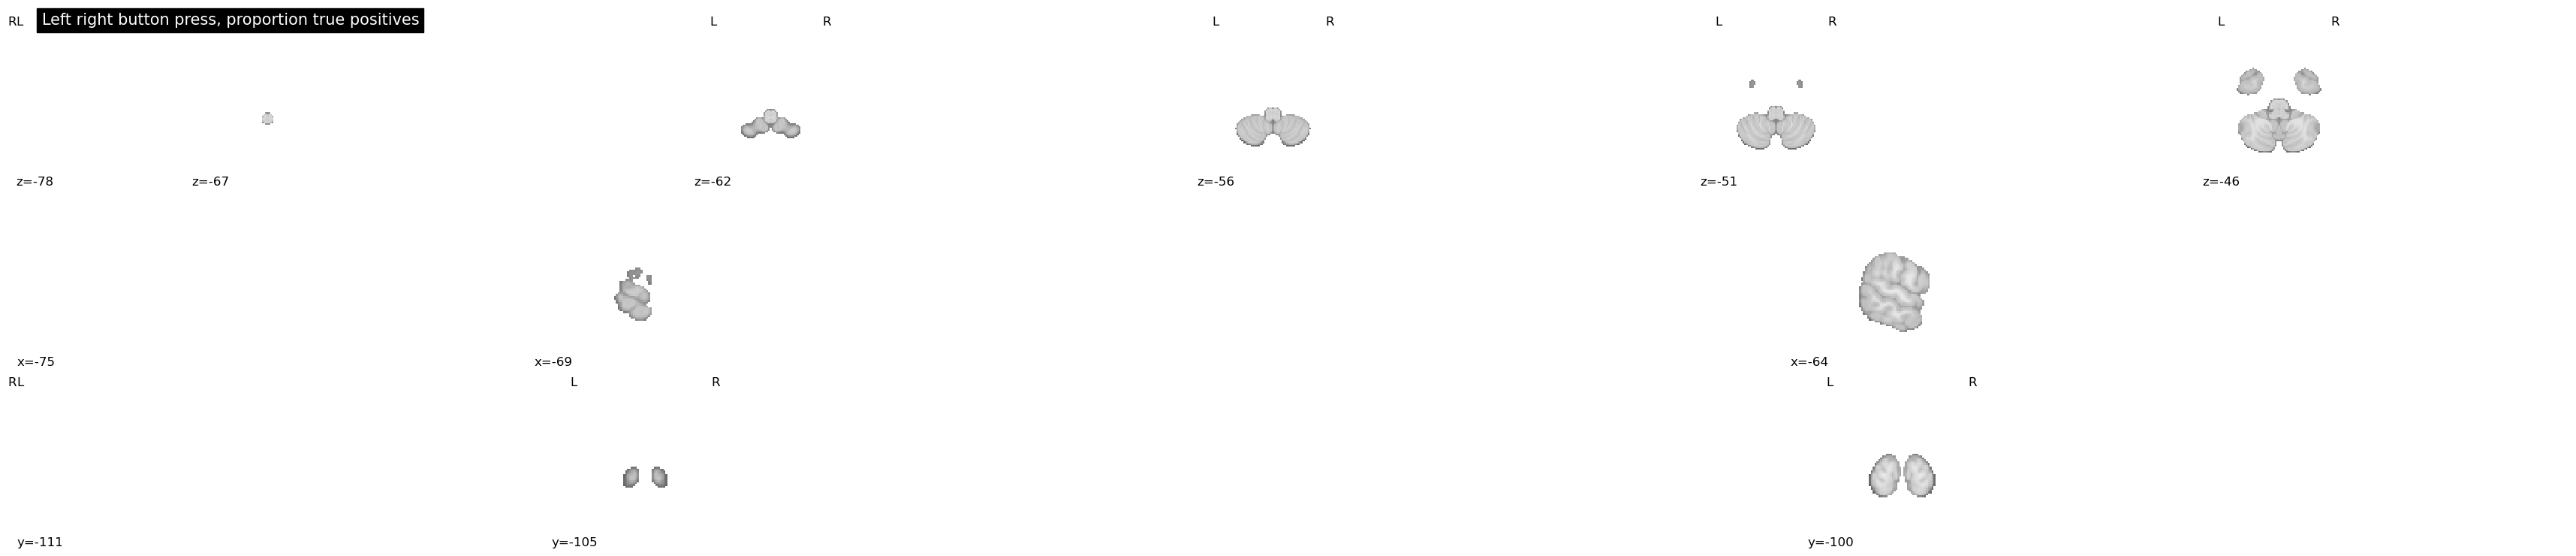

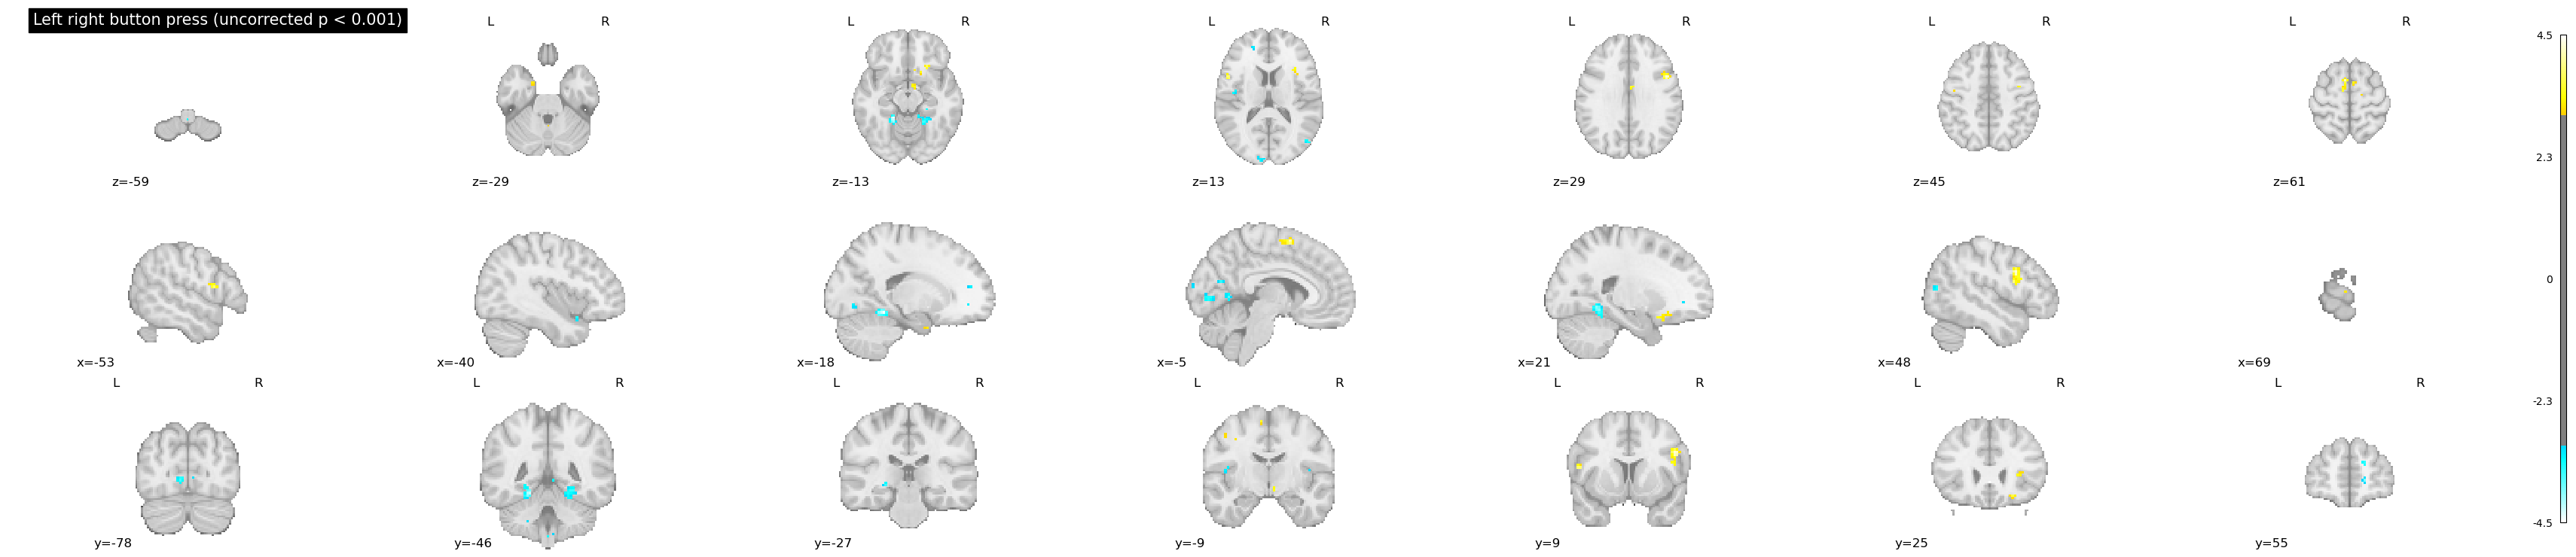

In [11]:

p_val = 0.001
p001_uncorrected = norm.isf(p_val)


proportion_true_discoveries_img = cluster_level_inference(
    z_map, threshold=[3, 4, 5], alpha=0.05
)

plotting.plot_stat_map(
    proportion_true_discoveries_img,
    threshold=0.0,
    display_mode="mosaic",
    vmax=1,
    colorbar=True,
    title="Left right button press, proportion true positives",
)

plotting.plot_stat_map(
    z_map,
    threshold=p001_uncorrected,
    colorbar=True,
    display_mode="mosaic",
    title="Left right button press (uncorrected p < 0.001)",
)

plotting.show()